In [2]:
import osmnx as ox, networkx as nx, geopandas as gpd, matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
from descartes import PolygonPatch
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
ox.config(use_cache=True, log_console=True)
ox.__version__

'0.15.1'

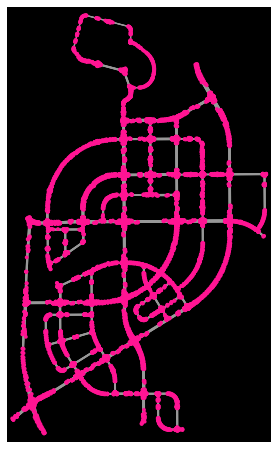

In [3]:
G = ox.graph_from_xml('A2_LINK.osm', simplify=False)
fig, ax = ox.plot_graph(G, node_zorder=2, node_color='deeppink', bgcolor='k')

In [78]:
G_proj = ox.project_graph(G)

In [79]:
orig_node = ox.get_nearest_node(G, (35.7072807, 128.4529979)) #E5 주차장
dest_node = ox.get_nearest_node(G, (35.7030221, 128.4578677)) #학교 정문

In [80]:
print(orig_node)
print(dest_node)

-140200
-131252


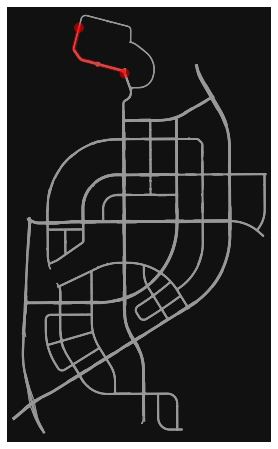

In [81]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mpl.rc('font', family='NanumGothic') #한글 폰트 적용시
plt.rcParams["figure.figsize"] = (20,20) #차트 사이즈

# find the route between these nodes then plot it
route = nx.shortest_path(G, orig_node, dest_node, weight='length')
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [82]:
print(route)

[-140200, -134110, -134105, -134104, -196735, -126974, -126965, -126964, -146527, -144720, -144715, -144714, -146739, -146737, -146733, -146731, -146728, -146725, -130304, -130288, -130277, -130271, -130263, -130260, -130257, -130254, -130251, -130240, -130239, -132331, -127203, -127190, -127189, -146287, -144960, -144947, -134992, -134990, -134988, -134986, -134983, -134982, -135936, -135938, -135940, -135942, -128700, -140448, -140450, -140452, -140454, -127520, -143864, -143866, -143868, -143870, -141678, -141679, -141778, -141782, -141786, -141789, -129496, -131240, -131244, -131247, -131252]


In [83]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
#gdf_nodes.loc[route]

In [84]:
gdf_nodes.loc[G]

,y,x,osmid,geometry
-196603,35.691880,128.453468,-196603,POINT (128.45347 35.69188)
-196597,35.691969,128.453525,-196597,POINT (128.45353 35.69197)
-163827,35.672514,128.447764,-163827,POINT (128.44776 35.67251)
-163826,35.673405,128.456847,-163826,POINT (128.45685 35.67341)
-163825,35.673386,128.456862,-163825,POINT (128.45686 35.67339)
...,...,...,...,...
-163859,35.681124,128.464699,-163859,POINT (128.46470 35.68112)
-196626,35.693575,128.457235,-196626,POINT (128.45723 35.69358)
-163851,35.681199,128.464850,-163851,POINT (128.46485 35.68120)
-163850,35.681210,128.464872,-163850,POINT (128.46487 35.68121)


In [6]:
G.nodes[-126963]['y']

35.69862357632

In [86]:
G.nodes[-105095] #특정 노드들은 애초에 불러오질 않음 ㅠ

{'y': 35.70046465643, 'x': 128.46723902227, 'osmid': -105095}

In [91]:
import sys

print("--sys.version—")
print(sys.version)

--sys.version—
3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
